# 线性回归（二）


<font color=blue size=4>1.课堂实验任务</font>


In [1270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<span style="color:purple">1) 使用 pandas 库的 read_csv()函数(可以参考[pandas 的官方文档](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html))将训练数据集'train.csv'和测试数据集'test.csv'载入到 Dataframe 对象中。</span>


In [1271]:
# Your code here

# 读取数据集
train_frame = pd.read_csv("train.csv")
test_frame = pd.read_csv("test.csv")

# 转化成numpy矩阵
train = np.array(train_frame)
test = np.array(test_frame)

<span style="color:purple"> 假设模型为一元线性回归模型$\hat{y}=wx+b$, 损失函数为$l(w,b)=\frac{1}{2}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$, 其中$\hat{y}^{(i)}$表示第$i$个样本的预测值，$y^{(i)}$表示第$i$个样本的实际标签值, $m$为训练集中样本的个数。求出使得损失函数最小化的参数$w$和$b$。</span>


方法 ①

将$l(w,b)$分别对$w$和$b$求导，得到

$$
\frac{\partial l(w,b)}{\partial w}=w\sum_{i=1}^m x_i^2 -\sum_{i=1}^m (y_i-b)x_i,
$$

$$
\frac{\partial l(w,b)}{\partial b}=mb -\sum_{i=1}^m (y_i-wx_i),
$$

令上述两式为零即可得到$w$和$b$的解析解：

$$
w=\frac{\sum_{i=1}^m y_i (x_i-\bar{x})}{\sum_{i=1}^m x_i^2-\frac{1}{m}(\sum_{i=1}^m x_i)^2},
$$

$$
b=\frac{1}{m}\sum_{i=1}^m(y_i-wx_i),
$$

其中$\bar{x}=\frac{1}{m}\sum_{i=1}^m x_i$为$x$的均值。


In [1272]:
# 方法①
X = train[:, :-1]  # 获取X
Y = train[:, -1].reshape(-1, 1)  # 获取Y

X_mean = np.mean(X)  # x的均值
m = X.shape[0]  # 样本数量

W1 = np.sum(Y * (X - X_mean)) / (np.sum(np.square(X)) - (1 / m) * (np.sum(X)) ** 2)
b1 = (1 / m) * np.sum(Y - W1 * X)
print("方法① W =", W1, ",b =", b1)

方法① W = 3.041478870014284 ,b = 4.906073659228105


方法 ② 梯度下降法。手动实现梯度下降法(不使用机器学习框架，如 PyTorch、TensorFlow 等)来进行模型的训练。算法步骤如下：1.初始化模型参数$w$和$b$的值；2.在负梯度的方向上更新参数(批量梯度下降、小批量随机梯度下降或者随机梯度下降均可)，并不断迭代这一步骤，更新公式(以小批量随机梯度下降为例)可以写成：$$w\gets w-\frac{\eta}{\left|B\right|}\sum_{i\in{B}}x^{(i)}(wx^{(i)}+b-y^{(i)})$$, 和$$b\gets b-\frac{\eta}{\left|B\right|}\sum_{i\in{B}}(wx^{(i)}+b-y^{(i)})$$， 其中$\eta$表示学习率,$B$表示每次迭代中随机抽样的小批量，$\left|B\right|$则表示$B$中的样本数量。3. 终止条件为迭代次数达到某一上限或者参数更新的幅度小于某个阈值。


方法② W = 3.041478870014284 ,b = 4.906073659228103
梯度下降前的损失: 11111.683275887586
梯度下降后的损失: 13.52177810515445


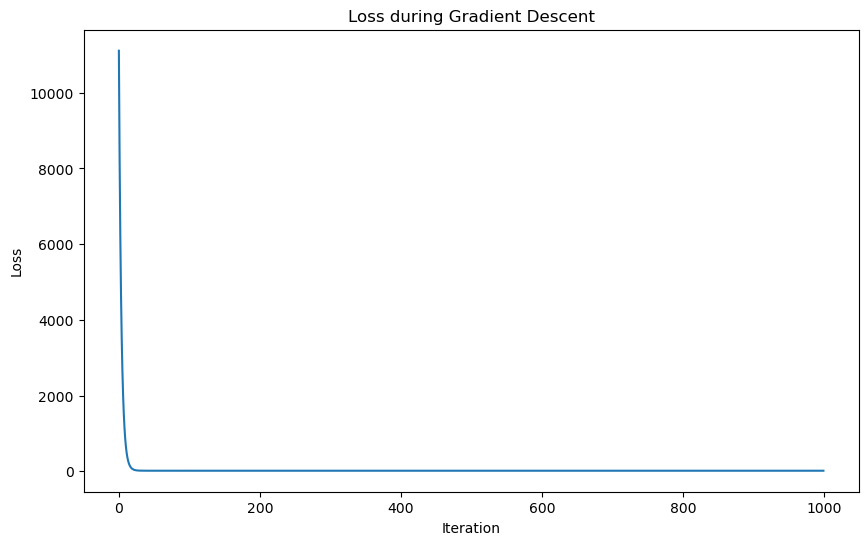

In [1273]:
# 方法② 批量梯度下降法

X1 = train[:, :-1]  # 获取X
Y1 = train[:, -1].reshape(-1, 1)  # 获取Y


def gradient_descent(X, Y, learning_rate=0.5, n_iteration=1000):
    m, n = X.shape  # m表示样本数量 n表示特征数量
    X = np.insert(X, X.shape[1], 1, axis=1)  # 添加1到原始数据的最后面，代替b或w0
    parameters = np.random.randn(n + 1, 1)  # 随机初始化参数
    loss_list = []
    for iteration in range(n_iteration):
        Y_pred = X.dot(parameters)  # 计算预测值
        loss = 1 / 2 * np.sum(np.square(Y_pred - Y))  # 计算损失
        loss_list.append(loss)  # 存储损失

        gradients = 1 / m * X.T @ (X @ parameters - Y)
        parameters -= learning_rate * gradients
    return parameters, loss_list  # 返回参数列表和损失值列表


def new_gradient_descent(X, Y, learning_rate=0.5, n_iteration=1000, tol=1e-8):
    m, n = X.shape
    X = np.insert(X, X.shape[1], 1, axis=1)  # 添加1到原始数据的最后面
    parameters = np.random.randn(n + 1, 1)
    loss_list = []

    for iteration in range(n_iteration):
        Y_pred = X.dot(parameters)
        loss = 1 / 2 * np.sum(np.square(Y_pred - Y))
        loss_list.append(loss)

        # 如果前后损失之差小于给定阈值，停止迭代
        if iteration > 0 and abs(loss_list[-1] - loss_list[-2]) < tol:
            print(f"在迭代 {iteration} 处达到收敛.")
            break

        gradients = 1 / m * X.T @ (X @ parameters - Y)
        parameters -= learning_rate * gradients

    return parameters, loss_list


para, losses = gradient_descent(X1, Y1)
W2 = para[0][0]
b2 = para[1][0]
print("方法② W =", W2, ",b =", b2)

print("梯度下降前的损失:", losses[0])
print("梯度下降后的损失:", losses[len(losses) - 1])

# 可视化损失值
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss during Gradient Descent")
plt.show()

方法 ③

用矩阵表示，假设数据集有$m$个样本，特征有$n$维$。X=\left[ \begin{matrix} x_{11} & x_{12} & \cdots & x_{1n} & 1 \\
                         x_{21} & x_{22} & \cdots & x_{2n} & 1 \\
                         \vdots & \vdots &      & \vdots & \vdots \\
                         x_{m1} & x_{m2} & \cdots & x_{mn} & 1 \end{matrix} \right]$,
实际标签$Y=\left[ \begin{matrix} y_{1} \\
                         y_{2} \\
                         \vdots \\
                         y_{m}\end{matrix} \right]$,
参数$B=\left[ \begin{matrix} w_{1} \\
                         w_{2} \\
                         \vdots \\
                         w_{n} \\
                         b\end{matrix} \right]$，则解析解为$B^*=(X^T X)^{-1}X^T Y$。


In [1274]:
# 方法③ 矩阵解法
X = train[:, :-1]
Y = train[:, -1]

# 转换为列向量后最后一列新添1
X = np.insert(X, 1, 1, axis=1)
Y = Y.reshape(-1, 1)

# 根据公式求得解析解
B = np.linalg.inv(X.T @ X) @ X.T @ Y
# 得到W和b
W3 = B[0][0]
b3 = B[1][0]
# 打印W3和b
print("方法③ W =", W3, ",b =", b3)

方法③ W = 3.041478870014285 ,b = 4.906073659228103


<span style="color:purple"> 使用求解出来的线性回归模型对测试数据集'test.csv'进行预测，输出可视化结果（比如用 seaborn 或者 matplotlib 等可视化库来画出测试数据的散点图以及训练好的模型函数图像）。</span>


方法① W = 3.041478870014284 ,b = 4.906073659228105
方法② W = 3.041478870014284 ,b = 4.906073659228103
方法③ W = 3.041478870014285 ,b = 4.906073659228103


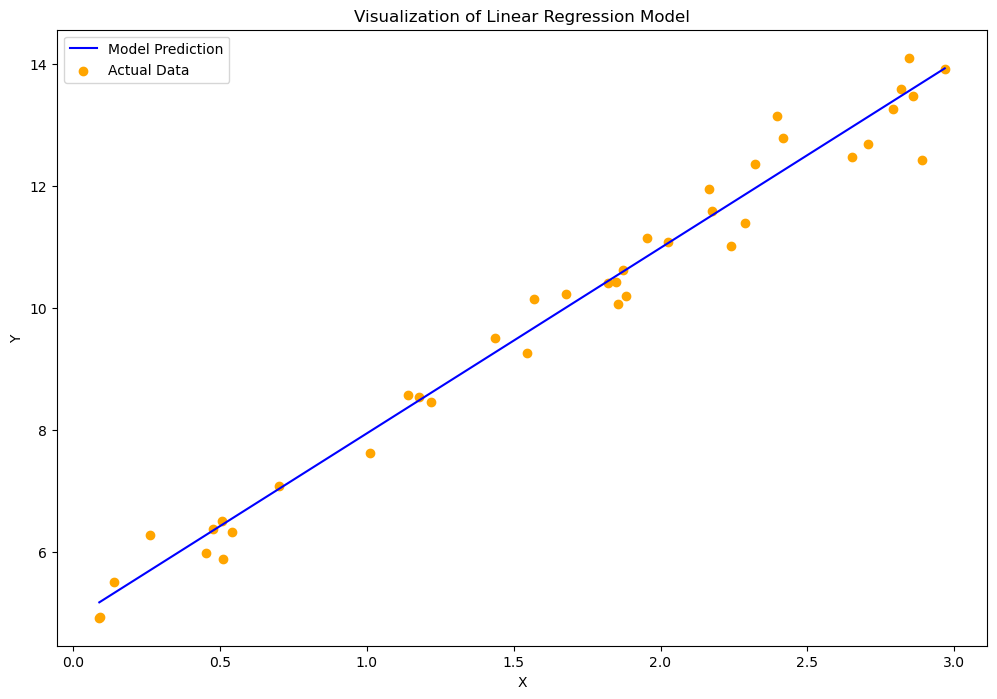

In [1275]:
print("方法① W =", W1, ",b =", b1)
print("方法② W =", W2, ",b =", b2)
print("方法③ W =", W3, ",b =", b3)

# 由于三种方法求解出的W和b及其相近 任意采取一组作为参数进行预测


# 可视化绘图函数
def visualize_regression(data_frame: pd.DataFrame, w, b):
    # 获取特征x的范围值
    x = np.linspace(data_frame.iloc[:, 0].min(), data_frame.iloc[:, 0].max(), 100)

    # 基于模型参数计算预测的y值
    predictions = w * x + b

    plt.figure(figsize=(12, 8))
    plt.xlabel("X")
    plt.ylabel("Y")

    # 绘制预测的线型图
    plt.plot(x, predictions, color="blue", label="Model Prediction")

    # 绘制数据的散点图
    plt.scatter(
        data_frame.iloc[:, 0],
        data_frame.iloc[:, 1],
        color="orange",
        label="Actual Data",
    )
    plt.legend(loc="best")  # 创建图例
    plt.title("Visualization of Linear Regression Model")
    plt.show()


# 对测试数据集'test.csv'进行预测
test_data = pd.read_csv("test.csv")
visualize_regression(test_data, W2, b2)

<span style="color:purple"> 在训练数据集'train2.csv'上求一个三元线性回归模型$\hat{y}=w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$的使得损失函数$l(w_0,w_1,w_2,w_3)=\frac{1}{2}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$最小的参数$w_0,w_1,w_2$以及$w_3$。并在测试数据集'test2.csv'上进行预测，输出预测结果的均方误差$MSE(\hat{y},y)=\frac{1}{n}\sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2$, $n$为测试集中样本个数。</span>


方法 ① 同 2)中的方法 ③。


In [1276]:
# 方法① 矩阵解法

train2_frame = pd.read_csv("train2.csv")
train2 = np.array(train2_frame)

X2 = train2[:, :-1]
Y2 = train2[:, -1]

# 转换为列向量后最后一列新添1
X2 = np.insert(X2, X2.shape[1], 1, axis=1)
Y2 = Y2.reshape(-1, 1)

# 根据公式求得解析解
B2 = np.linalg.inv(X2.T @ X2) @ X2.T @ Y2
# 得到W参数
w0 = B2[3][0]
w1 = B2[0][0]
w2 = B2[1][0]
w3 = B2[2][0]
# 打印W3和b
print("方法① w0 =", w0, ",w1 =", w1, ",w2 =", w2, ",w3 =", w3)
# print(B2)

方法① w0 = 5.9425439272594325 ,w1 = 1.0072300078584795 ,w2 = 2.003393711530757 ,w3 = 3.0102562412206195


方法 ② 类似 2)中的方法 ②。算法步骤如下：1.初始化模型参数$w_0,w_1,w_2,w_3$的值；2.在负梯度的方向上更新参数(批量梯度下降、小批量随机梯度下降或者随机梯度下降均可)，并不断迭代这一步骤，更新公式(以小批量随机梯度下降为例)可以写成：$$w_j\gets w_j-\frac{\eta}{\left|B\right|}\sum_{i\in{B}}x_j^{(i)}(w_0 + w_1 x_1^{(i)}+w_2 x_2^{(i)}+w_3 x_3^{(i)}-y^{(i)}), j=0,1,2,3$$, 其中$x_0^{(i)}=1$， 其中$\eta$表示学习率,$B$表示每次迭代中随机抽样的小批量，$\left|B\right|$则表示$B$中的样本数量。3. 终止条件为迭代次数达到某一上限或者参数更新的幅度小于某个阈值。


在迭代 1072 处达到收敛.
方法② w0 = 5.942287459315534 ,w1 = 1.0072607745790545 ,w2 = 2.0034250487243592 ,w3 = 3.0102893091825447
梯度下降前的损失: 55393.59123800737
梯度下降后的损失: 12.75271004444502


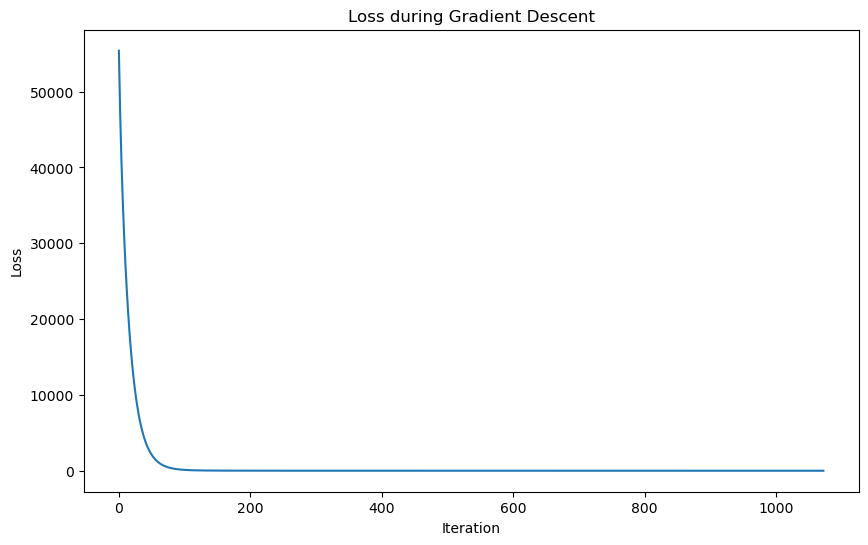

In [1277]:
# 方法② 批量梯度下降法
X2 = train2[:, :-1]
Y2 = train2[:, -1].reshape(-1, 1)

# 直接调用之前写好的批量梯度下降法的函数
res_para, res_losses = new_gradient_descent(X2, Y2, 0.095, 4000)
print(
    "方法② w0 =",
    res_para[3][0],
    ",w1 =",
    res_para[0][0],
    ",w2 =",
    res_para[1][0],
    ",w3 =",
    res_para[2][0],
)
print("梯度下降前的损失:", res_losses[0])
print("梯度下降后的损失:", res_losses[len(res_losses) - 1])
# print(res_para)
# 可视化损失值
plt.figure(figsize=(10, 6))
plt.plot(res_losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss during Gradient Descent")
plt.show()

均方误差的计算


In [1278]:
# 计算均方误差
test2_frame = pd.read_csv("test2.csv")
test2 = np.array(test2_frame)
X2_test = test2[:, :-1]
X2_test = np.insert(X2_test, X2_test.shape[1], 1, axis=1)  # 最后一列插入1
Y2_test = test2[:, -1].reshape(-1, 1)


print("方法① w0 =", w0, ",w1 =", w1, ",w2 =", w2, ",w3 =", w3)  # 存储于B2中
print(
    "方法② w0 =",
    res_para[3][0],
    ",w1 =",
    res_para[0][0],
    ",w2 =",
    res_para[1][0],
    ",w3 =",
    res_para[2][0],
)  # 存储于res_para中

Y2_pre1 = X2_test @ B2
Y2_pre2 = X2_test @ res_para


# 定义计算均方误差的函数
def compute_mse(Y_pre, Y_test):
    return np.sum(np.square(Y_test - Y_pre)) / len(Y_pre)


MSE1 = compute_mse(Y2_pre1, Y2_test)
MSE2 = compute_mse(Y2_pre2, Y2_test)
print()
print("方法① 均方误差：", MSE1)
print("方法② 均方误差：", MSE2)

方法① w0 = 5.9425439272594325 ,w1 = 1.0072300078584795 ,w2 = 2.003393711530757 ,w3 = 3.0102562412206195
方法② w0 = 5.942287459315534 ,w1 = 1.0072607745790545 ,w2 = 2.0034250487243592 ,w3 = 3.0102893091825447

方法① 均方误差： 0.16537691128951923
方法② 均方误差： 0.165374088329975


<font color=blue size=4>2.相关链接</font>


1.实验报告提交链接(有效期直至 9.15 14:20): https://send2me.cn/211f55kq/Sgav4JPN0foh9Q


2.实验课件获取链接: https://www.jianguoyun.com/p/DWcqLm4Qp5WhChjZi5sFIAA
